In [1]:
import numpy as np
# from tensorflow.keras import optimizers,Sequential, layers, Model
import matplotlib.pyplot as plt
# import tensorflow as tf


from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import json

In [37]:
from matplotlib import colors

In [2]:
# 单层预测
class FcCvModelV(Model):
    def __init__(self):
        super(FcCvModelV, self).__init__()
        # 多层全链接的第一层，每一道数据的提取
        # 实际上是在每道上的滑动全连接
        self.fcOne = Sequential([
            layers.Dense(64),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2),
            layers.Dense(8),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        # 1.减少过拟合的情况
        # 2.模拟道数据的丢失
        self.dropout_fc = layers.Dropout(0.3)

        # 1维卷积综合提取特征
        self.conv1 = Sequential([
            layers.Conv1D(filters=64, kernel_size=9, strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        self.dropout_c1 = layers.Dropout(0.3)
        self.conv2 = Sequential([
            layers.Conv1D(filters=64, kernel_size=9, strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        self.dropout_c2 = layers.Dropout(0.3)
        # 1维卷积综合提取特征+降维
        self.conv3 = Sequential([
            layers.Conv1D(filters=128, kernel_size=4, strides=4, padding='valid'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        self.dropout_c3 = layers.Dropout(0.3)
        # 1维卷积综合提取特征
        self.conv4 = Sequential([
            layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        self.dropout_c4 = layers.Dropout(0.3)
        self.conv5 = Sequential([
            layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        self.dropout_c5 = layers.Dropout(0.3)
        # 1维卷积综合提取特征+降维
        self.conv6 = Sequential([
            layers.Conv1D(filters=256, kernel_size=4, strides=4, padding='valid'),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2)
        ])
        # 最终作出异常体坐标与半径的预测
        self.fcThree = Sequential([
            layers.Dense(512)
        ])

    def call(self, inputs, training=None, mask=None):
        batchSize, dao_num, data_num = inputs.shape
        x = tf.reshape(inputs, (-1, 1024))
        x = self.fcOne(x)
        x = tf.reshape(x, (batchSize, dao_num, -1))
        x = tf.transpose(x, perm=[0, 2, 1])
        x = self.dropout_fc(x, training=training)
        x = self.conv1(x)
        x = self.dropout_c1(x, training=training)
        x = self.conv2(x)
        x = self.dropout_c2(x, training=training)
        x = self.conv3(x)
        x = self.dropout_c3(x, training=training)
        x = self.conv4(x)
        x = self.dropout_c4(x, training=training)
        x = self.conv5(x)
        x = self.dropout_c5(x, training=training)
        x = self.conv6(x)
        x = tf.reshape(x, (batchSize, -1))
        x = self.fcThree(x)
        return x

In [3]:
model = FcCvModelV()
model.load_weights(r'E:\tools\写论文\图表数据\单层向斜背斜预测\weights\weights_'+str(1798))

In [8]:
test_x = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\x_test_512_1.npy')
test_y = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\x_test_s_1.npy')*1000

In [6]:
y_test_pred = model(test_x)
test_loss = tf.reduce_mean(tf.losses.MSE(y_test_pred, test_y))

In [10]:
test_loss

<tf.Tensor: id=679, shape=(), dtype=float32, numpy=25.656101>

In [3]:
y_test_pred = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\y_test_pred.npy')

In [54]:
data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev = np.array(data_json)
loss_dev_index = loss_dev[:,1]
loss_dev_loss = loss_dev[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train = np.array(data_json)
loss_train_index = loss_train[:,1]
loss_train_loss = loss_train[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_300+-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_300 = np.array(data_json)
loss_dev_300_index = loss_dev_300[:,1]
loss_dev_300_loss = loss_dev_300[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_300+-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_300 = np.array(data_json)
loss_train_300_index = loss_train_300[:,1]
loss_train_300_loss = loss_train_300[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_450+-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_450 = np.array(data_json)
loss_dev_450_index = loss_dev_450[:,1]
loss_dev_450_loss = loss_dev_450[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_450+-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_450 = np.array(data_json)
loss_train_450_index = loss_train_450[:,1]
loss_train_450_loss = loss_train_450[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_1362_2-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_1362 = np.array(data_json)
loss_dev_1362_index = loss_dev_1362[:,1]
loss_dev_1362_loss = loss_dev_1362[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\单层向斜背斜预测\run-loss_all_Fcov_xiangxiebeixie_1362_2-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_1362 = np.array(data_json)
loss_train_1362_index = loss_train_1362[:,1]
loss_train_1362_loss = loss_train_1362[:,2]

In [40]:
np.save(r'E:\tools\写论文\图表数据\单层向斜背斜预测\dev_index',dev_index)
np.save(r'E:\tools\写论文\图表数据\单层向斜背斜预测\dev_loss',dev_loss)
np.save(r'E:\tools\写论文\图表数据\单层向斜背斜预测\train_index',train_index)
np.save(r'E:\tools\写论文\图表数据\单层向斜背斜预测\train_loss',train_loss)

In [55]:
dev_index = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\dev_index.npy')
dev_loss = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\dev_loss.npy')
train_index = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\train_index.npy')
train_loss = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\train_loss.npy')

In [60]:
train_loss[-1]

27.157630920410156

In [61]:
dev_loss[-1]

31.656816482543945

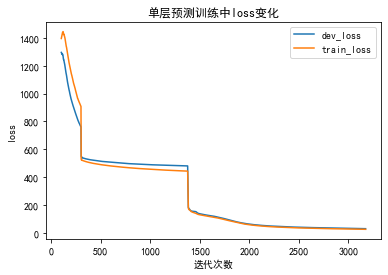

In [41]:
plt.title("单层预测训练中loss变化")
plt.ylabel("loss")
plt.xlabel("迭代次数")
plt.plot(dev_index,dev_loss,label='dev_loss')
plt.plot(train_index,train_loss,label='train_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\单层向斜背斜预测\单层预测训练中loss变化.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [42]:
len(dev_index)

2000

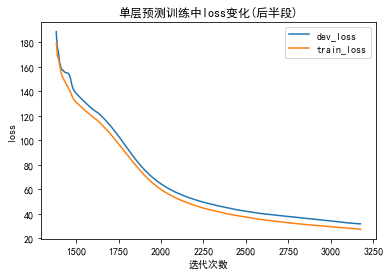

In [44]:
plt.title("单层预测训练中loss变化(后半段)")
plt.ylabel("loss")
plt.xlabel("迭代次数")
plt.plot(dev_index[1000:],dev_loss[1000:],label='dev_loss')
plt.plot(train_index[1000:],train_loss[1000:],label='train_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\单层向斜背斜预测\单层预测训练中loss变化(后半段).jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

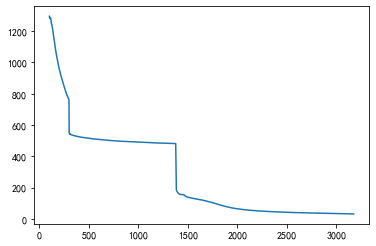

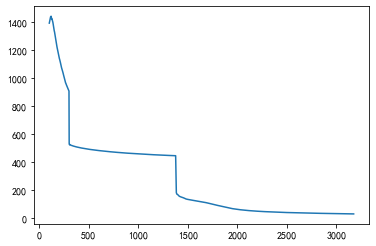

In [39]:
# plt.plot(loss_dev_index[2:300],loss_dev_loss[2:300])
# plt.show()
# plt.plot(loss_train_index[2:300],loss_train_loss[2:300])
# plt.show()

# plt.plot(loss_dev_450_index,loss_dev_450_loss)
# plt.show()
# plt.plot(loss_train_450_index,loss_train_450_loss)
# plt.show()
dev_index = np.concatenate([loss_dev_index[100:300],loss_dev_450_index[0:800] , 1378 + loss_dev_1362_index],axis=-1)
dev_loss = np.concatenate([loss_dev_loss[100:300],loss_dev_450_loss[0:800] , loss_dev_1362_loss],axis=-1)
train_index = np.concatenate([ loss_train_index[100:300],loss_train_450_index[0:800] , 1378 + loss_train_1362_index],axis=-1)
train_loss = np.concatenate([ loss_train_loss[100:300],loss_train_450_loss[0:800] , loss_train_1362_loss],axis=-1)

plt.plot(dev_index,dev_loss)
plt.show()
plt.plot(train_index,train_loss)
plt.show()

In [38]:
k = 0
count = 0
while k < 100:
    vpdata = np.zeros((512, 512), dtype=np.float32)
    x = np.random.randint(128, 384, size=(3))
    y = np.random.randint(256, 384, size=(3))
    x[0] = 0
    x[2] = 511
    z1 = np.polyfit(x, y, 2)
    p1 = np.poly1d(z1)
    depths = np.round(p1([i for i in range(512)])).astype(np.int32)
    if np.max(depths) > 511 or np.min(depths) < 0:
        print("no")
    else:
        max_depth = np.max(depths)
        min_depth = np.min(depths)
        change_up = int(min_depth / 3)
        change_deep = int((512 - max_depth) / 2)
        for depth_change in [-change_up, -2 * change_up, 0, change_deep]:
            for speed in [1500, 1600, 1700, 1800]:
                for i, depth in enumerate(depths + depth_change):
                    vpdata[i][0:depth] = speed
                    vpdata[i][depth:] = 2200
                vsdata = vpdata / np.sqrt(3)
                rhodata = 0.31 * vpdata ** (1 / 4) * 1000
                np.save(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(count),vpdata)
#                 保存模型为32float的二进制文件：
#                 vpdata.tofile(r'E:\model_512_speed_depth\model_sd_' + str(count) + '.vp')
#                 vsdata.tofile(r'E:\model_512_speed_depth\model_sd_' + str(count) + '.vs')
#                 rhodata.tofile(r'E:\model_512_speed_depth\model_sd_' + str(count) + '.rho')
                count += 1
        #                 plt.figure()
        #                 plt.imshow(vpdata.T,cmap=plt.cm.jet, interpolation='nearest',extent=[0,512,512,0])
        #                 plt.title('Layered model')
        #                 plt.xlabel('X [m]')
        #                 plt.ylabel('Depth [m]')
        #                 plt.tight_layout
        # plt.savefig('layered model')
        k = k + 1


KeyboardInterrupt: 

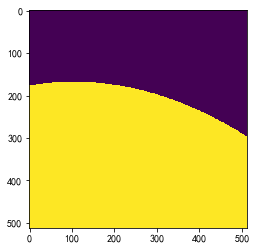

In [45]:
vpdata = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(49)+'.npy')
plt.imshow(vpdata.T)

In [46]:
vpdata1 = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(0)+'.npy')
vpdata2 = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(25)+'.npy')
vpdata3 = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(9)+'.npy')
vpdata4 = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\model\model_sd_' + str(49)+'.npy')
vpdatas = [vpdata1.T,vpdata2.T,vpdata3.T,vpdata4.T]

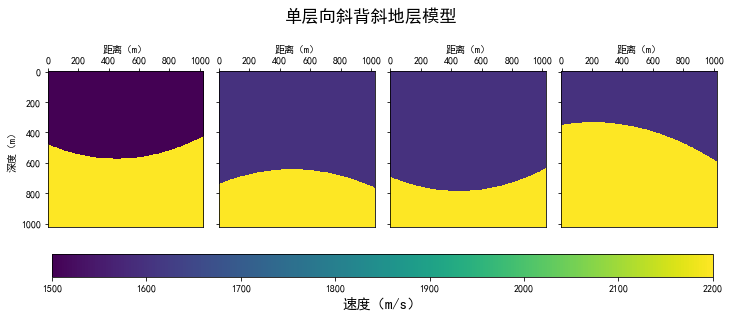

In [48]:
Nr = 1
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(12, 8))
fig.suptitle('单层向斜背斜地层模型',y=0.75,fontsize='xx-large')

images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
    axs[j].set_xticks([0,100,200,300,400,500])
    axs[j].set_xticklabels([0,200,400,600,800,1000])
    axs[j].set_yticks([0,100,200,300,400,500])
    axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.28, 0.765, 0.04])#位置[左,y,右,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='x-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\单层向斜背斜预测\单层向斜背斜地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()


In [51]:
# 时域标签计算

data = np.fromfile(r'E:\tools\写论文\图表数据\things\su_model\model_sd_6812.vp', dtype=np.float32)
vpdata1 = data.reshape(512, 512)

labels_512_1 = np.zeros((1,512),dtype=np.float32)
up_speed = -1
for i in range(512):
    for index, j in enumerate(vpdata1.T[:, i]):
        if up_speed == -1:
            up_speed = j
        if up_speed != j:
            labels_512_1[0, i] = index
            break
labels_512_1 = labels_512_1/up_speed

data = np.fromfile(r'E:\tools\写论文\图表数据\things\su_model\model_sd_4861.vp', dtype=np.float32)
vpdata2 = data.reshape(512, 512)

labels_512_2 = np.zeros((1,512),dtype=np.float32)
up_speed = -1
for i in range(512):
    for index, j in enumerate(vpdata2.T[:, i]):
        if up_speed == -1:
            up_speed = j
        if up_speed != j:
            labels_512_2[0, i] = index
            break
labels_512_2 = labels_512_2/up_speed

In [49]:
data = np.fromfile(r'E:\tools\写论文\图表数据\things\su_model\model_sd_6812.vp', dtype=np.float32)
vpdata1 = data.reshape(512, 512)
data = np.fromfile(r'E:\tools\写论文\图表数据\things\su_model\model_sd_4861.vp', dtype=np.float32)
vpdata2 = data.reshape(512, 512)

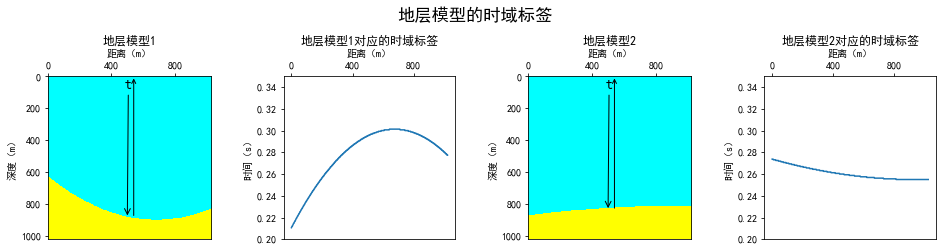

In [53]:
plt.figure(figsize=(16,3))
plt.suptitle("地层模型的时域标签",fontsize='xx-large',y=1.2)

colors_list = ['cyan', 'Lime','yellow'] 
cmap = colors.ListedColormap(colors_list)
plt.subplot(1,4,1)
plt.xlabel("距离（m）")
plt.ylabel("深度（m）")
plt.yticks([0,100,200,300,400,500],[0,200,400,600,800,1000])
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title("地层模型1",y=1.16)
plt.annotate('t',fontsize='x-large',xy=(250,443),xytext=(242,40),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('',xy=(270,0),xytext=(270,443),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.imshow(vpdata1.T,cmap = cmap)


plt.subplot(1,4,2)
plt.title('地层模型1对应的时域标签',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（s）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],labels_512_1[0])


plt.subplot(1,4,3)
plt.xlabel("距离（m）")
plt.ylabel("深度（m）")
plt.yticks([0,100,200,300,400,500],[0,200,400,600,800,1000])
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title("地层模型2",y=1.16)
plt.annotate('t',fontsize='x-large',xy=(250,420),xytext=(242,40),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('',xy=(270,0),xytext=(270,420),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.imshow(vpdata2.T,cmap = cmap)

plt.subplot(1,4,4)
plt.title('地层模型2对应的时域标签',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（s）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],labels_512_2[0])
plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\单层向斜背斜预测\时域标签.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [73]:
y_pred = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\y_test_pred.npy')
y_true = np.load(r'E:\tools\写论文\图表数据\单层向斜背斜预测\部分测试数据\x_test_s_1.npy')*1000

In [68]:
y_pred.shape

(512, 512)

In [152]:
np.mean(np.abs(y_pred - y_true))

3.5694575

355
360
274
255


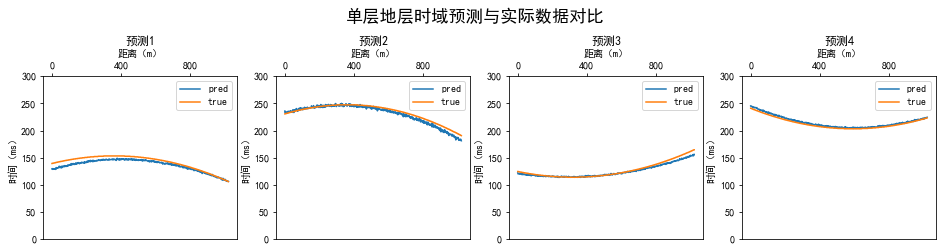

In [151]:
plt.figure(figsize=(16,3))
plt.suptitle("单层地层时域预测与实际数据对比",fontsize='xx-large',y=1.2)

plt.subplot(1,4,1)
# index = np.random.randint(0,512)
index=355
print(index)
plt.title('预测1',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（ms）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0,300)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],y_pred[index],label="pred")
plt.plot([i for i in range(512)],y_true[index],label='true')
plt.legend()
# plt.subplots_adjust(wspace=0.4, hspace=0.1)

plt.subplot(1,4,2)
# index = np.random.randint(0,512)
index = 360
print(index)
plt.title('预测2',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（ms）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0,300)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],y_pred[index],label="pred")
plt.plot([i for i in range(512)],y_true[index],label='true')
plt.legend()
# plt.subplots_adjust(wspace=0.4, hspace=0.1)

plt.subplot(1,4,3)
# index = np.random.randint(0,512)
index = 274
print(index)
plt.title('预测3',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（ms）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0,300)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],y_pred[index],label="pred")
plt.plot([i for i in range(512)],y_true[index],label='true')
plt.legend()
# plt.subplots_adjust(wspace=0.4, hspace=0.1)

plt.subplot(1,4,4)
# index = np.random.randint(0,512)
index = 255
print(index)
plt.title('预测4',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（ms）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.ylim(0,300)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],y_pred[index],label="pred")
plt.plot([i for i in range(512)],y_true[index],label='true')
plt.legend()
# plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\单层向斜背斜预测\单层地层时域预测与实际数据对比.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

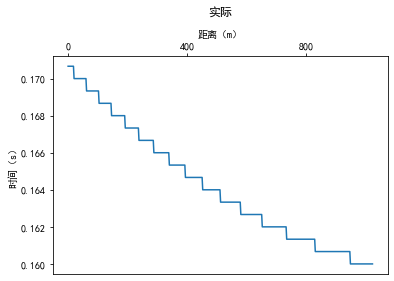

In [69]:
plt.title('实际',y=1.16)
plt.xlabel("距离（m）")
plt.ylabel('时间（s）')
plt.xticks([0,200,400],[0,400,800])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
# plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],y_true[0])
# plt.subplots_adjust(wspace=0.4, hspace=0.1)